# Part III: Data Cleaning and Visualisation

## **Imports**

In [1]:
import pandas as pd
import numpy as np
import datetime as d
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

## **Functions**

**Boxplot:** To deal with outliers

In [2]:
def distbox(feature):
  fig, axes = plt.subplots(1, 2, figsize=(20, 6))

  ax1 = sns.distplot(data[feature],ax=axes[0],kde=True,bins=30)
  ax2 = sns.boxplot(data[feature],ax=axes[1])

**Contlabel:** For data visualisation and understanding

In [3]:
def countlabel(feature, values):
  plt.figure(figsize=(10,5))
  ax = sns.countplot(data = data, x = feature, hue="label", palette = 'rocket')
  plt.xlabel(feature, fontsize= 12)
  plt.ylabel("Count", fontsize= 12)
  plt.ylim(0,6000)
  plt.xticks([*range(len(values))],values, fontsize = 11)
  for p in ax.patches:
      ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

  plt.show()

# **III.1 Data merging**

This part consists of merging and adding the dataset parts from the different sources used to compute the features and integrate them to create the final dataset

In [4]:
phish1 = pd.read_csv('./Datasets/feat_phish.csv') #contains a part of phishwebsites with 6 features calculated  seperatly 
phish2 = pd.read_csv('./Datasets/phish_file.csv') #contains a part of phishwebsites with the 12 other features calculated seperatly 
phish3 = pd.read_csv('./Datasets/phish_file2.csv') # complementary to phishfile 
phish4 = pd.read_csv('./Datasets/feat_phish_addvf.csv', header=None)  # complementary to feat_phish

In [5]:
legit1 = pd.read_csv('./Datasets/cleanvf.csv', header=None) #contains ligitwebsites with 6 features calculated  seperatly 
legit2 = pd.read_csv('./Datasets/legit_file.csv') #contains ligitwebsites with the other features calculated  seperatly 

In [6]:
complex_features = pd.read_csv('./Datasets/complex_features.csv') # contains 2 features for all the data that took so much time to be calculated
complex_features = complex_features.drop_duplicates().reset_index(drop=True)

**Fixing the header in some partial datasets**

In [7]:
feature_names = ['Link',	'URLofAnchor',	'NumberRedirects',	'checkWHOIS_exists',	'isinAlexa',	'NumbLinkToDomain',	'indexbyGoogle']
phish4.columns = feature_names
legit1.columns = feature_names

**Merging the datasets**

In [8]:
phish5 = pd.merge(phish1, phish2)
phish6 = phish4.merge(phish3, how='left')
phish = phish6.append(phish5)
legit = legit1.merge(legit2, on='Link', how='left')

**Extracting 3000 rows from each dataset to force data balance**

In [9]:
phish = phish.head(3000)
legit = legit.head(3000)

**Shuffling the final dataset**

In [10]:
data = phish.append(legit)
data = data.drop_duplicates().reset_index(drop=True)

In [11]:
data = data.merge(complex_features, on='Link', how='left')
data = data.sample(frac=1).reset_index(drop=True)
data = data.drop_duplicates().reset_index(drop=True)

The data construction was well oriented, hence all the features were judged significant.
We will go through all the features, visualize their caracteristics and take the adequate decisions to correct the anomalies.

In [12]:
data = data.replace(to_replace="None", value= np.nan)

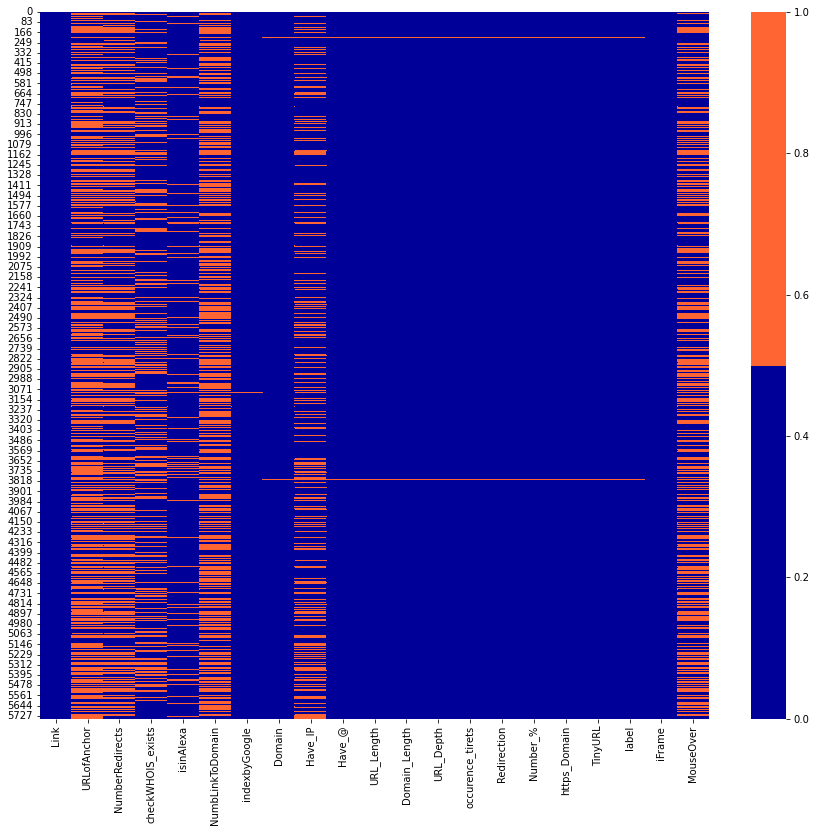

In [13]:
plt.figure(figsize=(15,13))
colours = ['#000099', '#FF6433']
sns.heatmap(data.isna(),xticklabels=data.columns,cmap=sns.color_palette(colours))
plt.show()

**Link :** This column contains 6000 unique values so it has no contribution in the model.

In [14]:
data = data.drop(['Link'], axis = 1).copy() 

**checkWHOIS_exists :** This feature contains many "None"s which is reasonable in case a website is not legitimate, the algorithm will iteate through the checkWHOIS database and surpass the threshold without finding a solution, hence the "None"s. So we made the decision to replace these values with 0.

In [15]:
data['checkWHOIS_exists'] = data['checkWHOIS_exists'].replace(to_replace=np.nan, value= int(0))

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='checkWHOIS_exists', ylabel='Density'>

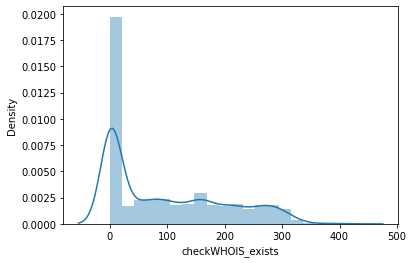

In [16]:
sns.distplot(data['checkWHOIS_exists'],kde=True,bins=20)

**NumbLinkToDomain :** This feature looks at all the links in a particular web page and counts the number of links that link back to the domain. Analyzing the distribution and the box plot, we found many outliers that we decided to set them to the max value that we judged reasonable by the boxplot.

In [17]:
data['NumbLinkToDomain'] = data['NumbLinkToDomain'].replace(to_replace=np.nan, value= 0)
data['NumbLinkToDomain'] = data['NumbLinkToDomain'].astype(int)

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\souhm\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


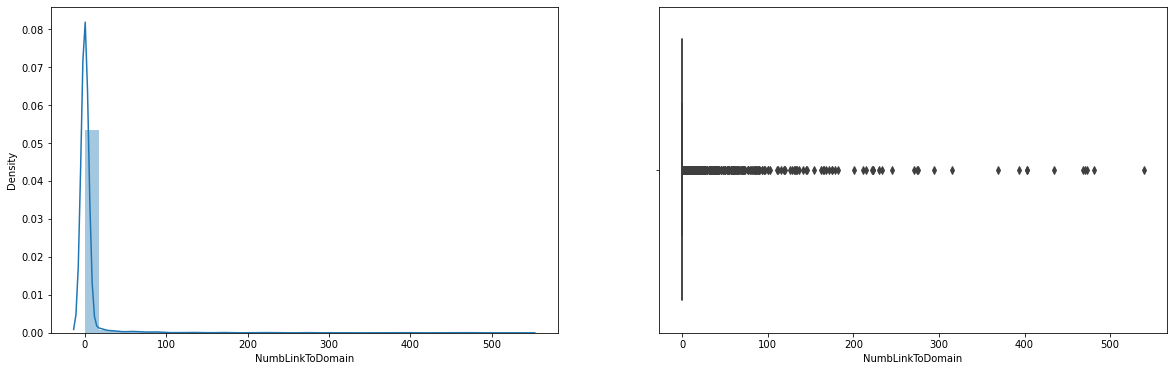

In [18]:
distbox('NumbLinkToDomain')

In [19]:
data.loc[data['NumbLinkToDomain'] > 20, 'NumbLinkToDomain'] = 20

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\souhm\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


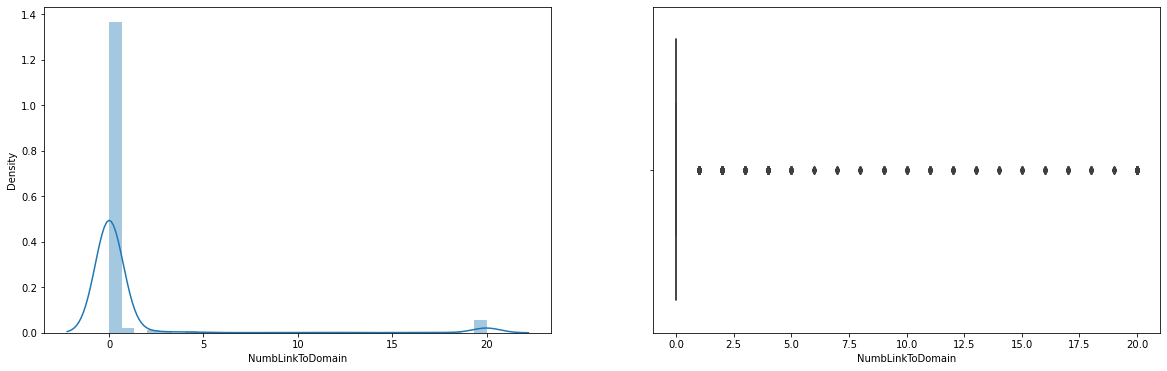

In [20]:
distbox('NumbLinkToDomain')

**Redirection :** This feature shows coherent reasonable values with a clear correlation with the label. In this case, le value 5 and 6 represents the protocol used: 5 in the case HTTP and 6 for HTTPS.  However, we decided to drop it because we don't want the classification to be based on the protcol (HTTP or HTTPS).

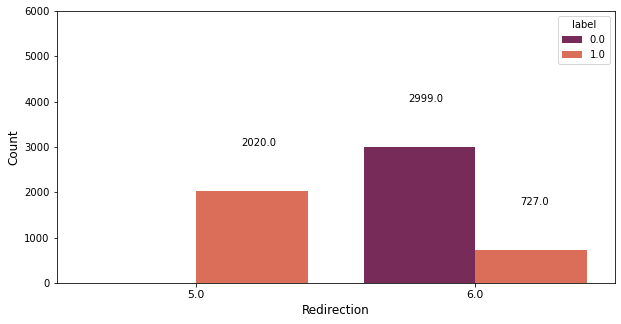

In [21]:
countlabel('Redirection', ['5.0','6.0'])

In [ ]:
data = data.drop(['Redirection'], axis = 1).copy() 

**occurence_tirets :** By analyzing the countplot, we can see that when the number of tirets is equal to one, the label is more likely to be 0. Starting from 2, the result is the opposite with many outliers starting from 3. change the column result to one occurence or more then one occurence.

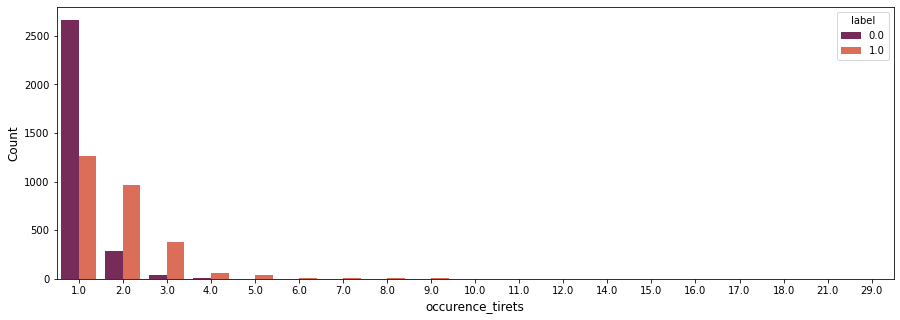

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data = data, x = 'occurence_tirets', hue="label", palette = 'rocket')
plt.xlabel('occurence_tirets', fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.show()

In [23]:
data.loc[data['occurence_tirets'] > 2.0, 'occurence_tirets'] = 0.0
data.loc[data['occurence_tirets'] < 2.0, 'occurence_tirets'] = 1.0

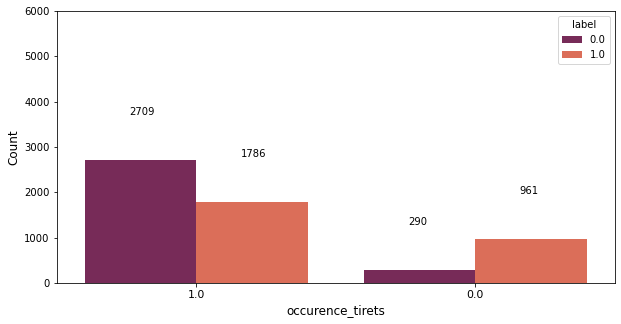

In [24]:
countlabel('occurence_tirets', ['1.0','0.0'])

**TinyURL :** This feature shows reasonable values and an acceptable significance on the results.

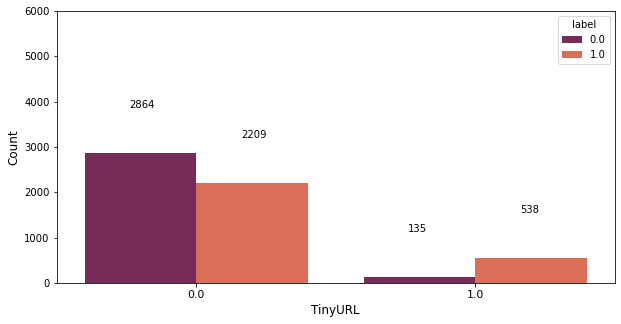

In [25]:
countlabel('TinyURL', ['0.0','1.0'])

**URLofAnchor :** The distribution of this feature shows a bimodal function with two maximum, one around 0 and one around 100.
However, this feature shows a very high number of None values that we were not able to interpret, hence we decided to drop it.

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URLofAnchor', ylabel='Density'>

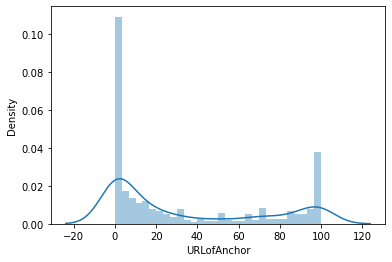

In [26]:
sns.distplot(data['URLofAnchor'],kde=True,bins=30)

In [27]:
data = data.drop(['URLofAnchor'], axis = 1).copy() 

**NumberRedirects :**

In [28]:
data['NumberRedirects'] = data['NumberRedirects'].replace(to_replace=np.nan, value= int(0))

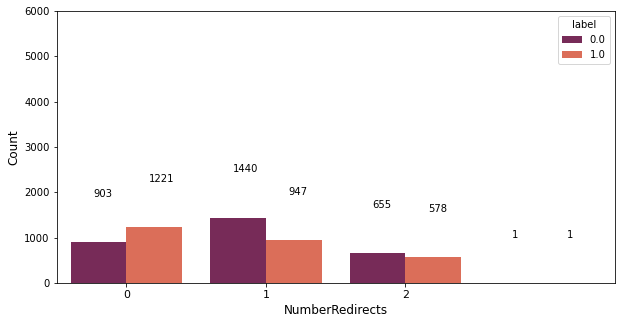

In [29]:
countlabel('NumberRedirects', ['0','1','2'])

**isinAlexa :** We decided to replace "None" by 0 because in this case, the algorithm searches through the 'Alexa' dataset and returns None if the timelapse surpasses a threshold. Hence, "None" is more likely to model a 0.

In [30]:
data['isinAlexa'] = data['isinAlexa'].replace(to_replace=np.nan, value= 0)

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='isinAlexa', ylabel='count'>

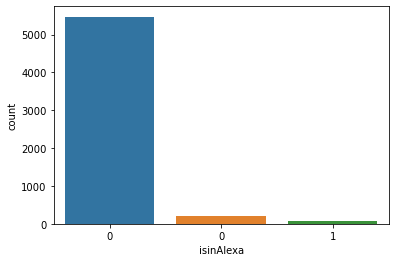

In [31]:
sns.countplot(data['isinAlexa'])

**Have_IP :** This feature has no significance since it shows if an URL has an IP that is more likely to be unique.

In [32]:
data = data.drop(['Have_IP'], axis = 1).copy() 

**Have_@ :** This feature shows reasonable results that may contibute to the classification process

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Have_@', ylabel='count'>

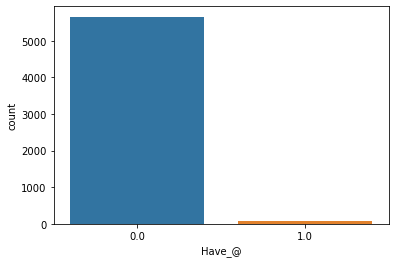

In [33]:
sns.countplot(data['Have_@'])

**URL_Length :** The feature shows an approximately normal distribution with many outliers starting from 100. We decided to give these outliers a value of 100 just to keep their influence in the process.

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\souhm\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


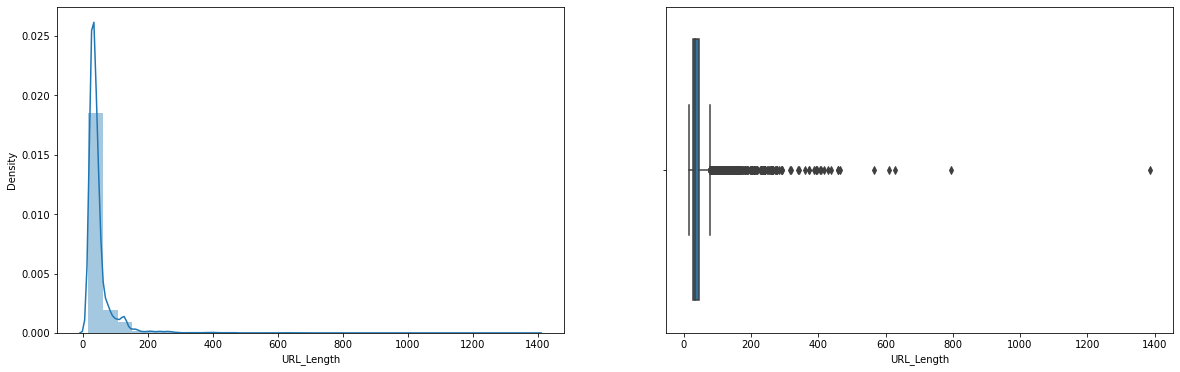

In [34]:
distbox('URL_Length')

In [35]:
data.loc[data['URL_Length'] > 120, 'URL_Length'] = 120

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\souhm\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


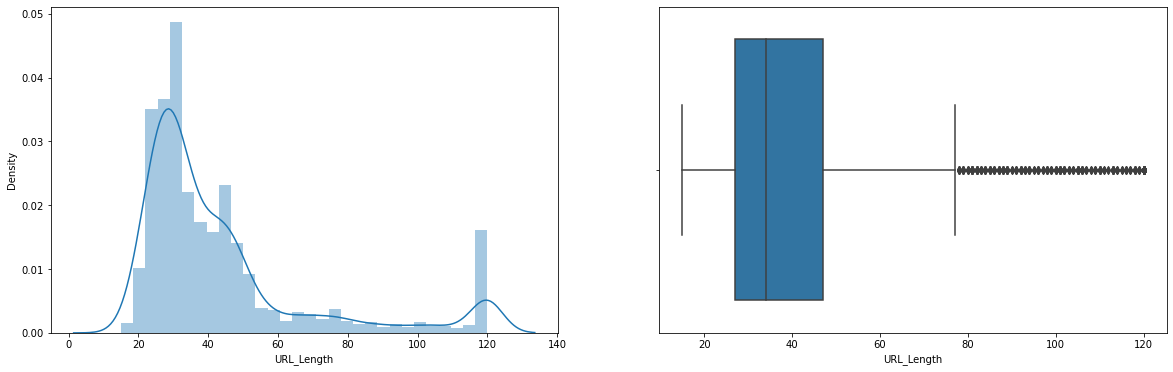

In [36]:
distbox('URL_Length')

**Domain Length :** This feature shows an approximately trimodal normal distribution with many outliers starting from 70. We decided to give these outliers a value of the third maxima to keep their influence in the process.

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\souhm\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


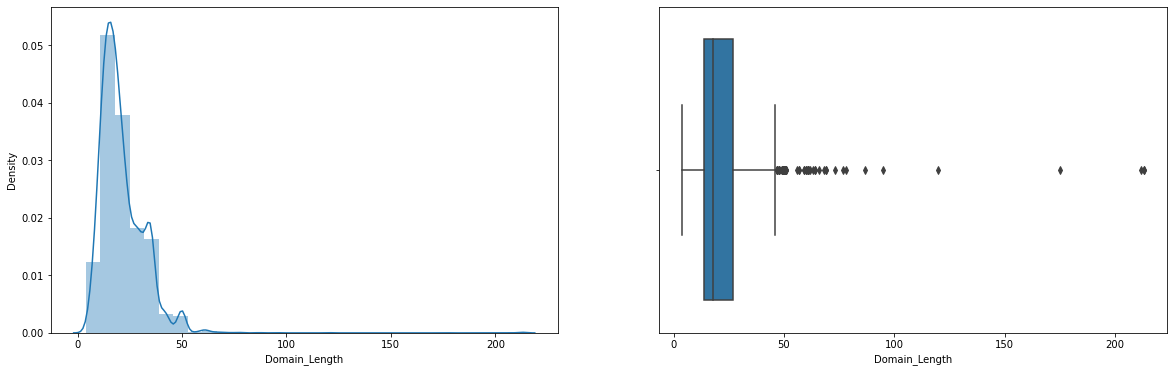

In [37]:
distbox('Domain_Length')

In [38]:
data.loc[data['Domain_Length'] > 50, 'Domain_Length'] = 50

C:\Users\souhm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\souhm\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


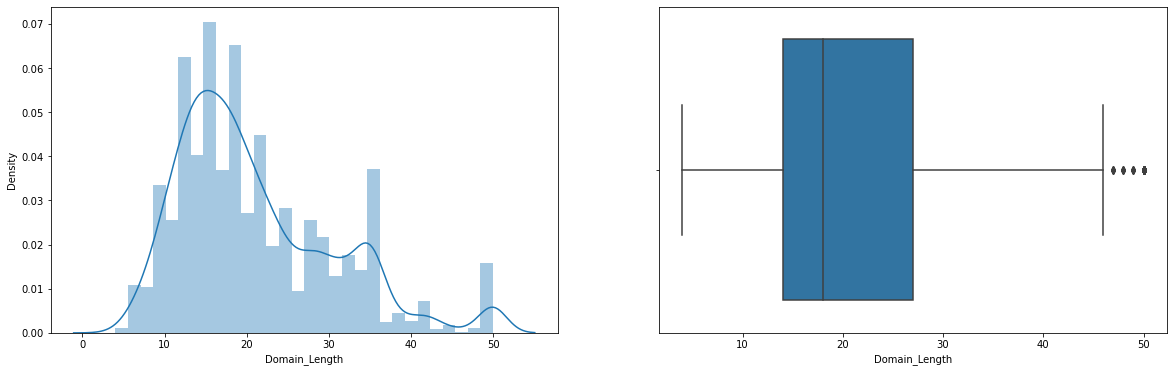

In [39]:
distbox('Domain_Length')

**URL_Depth :** This feature has no significance in the process since it has only one value.

In [40]:
data['URL_Depth'].value_counts()

1.0    5746
Name: URL_Depth, dtype: int64

In [41]:
data = data.drop(['URL_Depth'], axis = 1).copy() 

**https_Domain :** This feature has no significance in the process since it has only one value if we remove the outliers.

In [42]:
data['https_Domain'].value_counts()

0.0    5741
1.0       5
Name: https_Domain, dtype: int64

In [43]:
data = data.drop(['https_Domain'], axis = 1).copy() 

**IndexbyGoogle :** This feature checks whether a URL is indexed by Google. A value of "None" is given if the algorithm was not able to find the index within a timestamp. Consequently, we decided to replace them with 0.

In [44]:
data['indexbyGoogle'] = data['indexbyGoogle'].replace(to_replace=np.nan, value= 0)

In [45]:
data['indexbyGoogle'].value_counts()

1    4907
1     456
0     253
0     134
Name: indexbyGoogle, dtype: int64

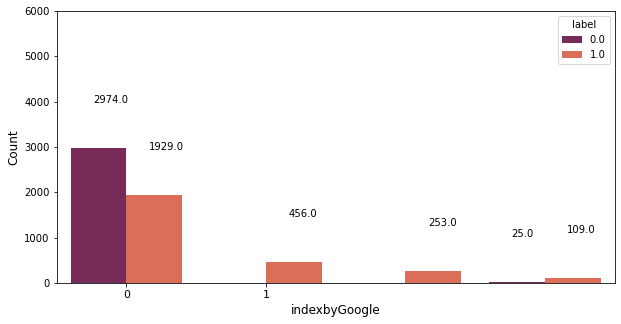

In [46]:
countlabel('indexbyGoogle', ['0','1'])

**IFrame :** This feature shows reasonable results that may contibute to the classification process

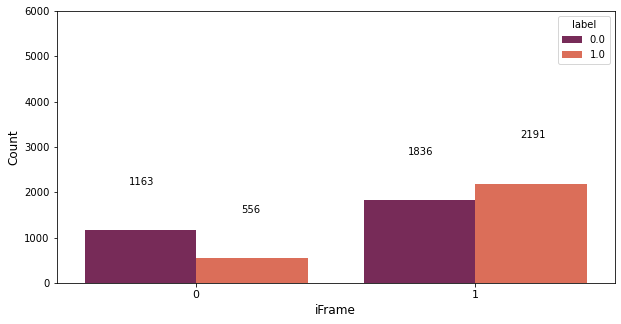

In [47]:
countlabel('iFrame', ['0','1'])

**MouseOver :** This feature looks for the “onMouseOver” event in the script of a web page, and check if it makes any changes on the status bar. Hence, a "None" value after the surpassion of the threshold is more likely to model an unchanged page or a search of the event with no results.


In [48]:
data['MouseOver'] = data['MouseOver'].replace(to_replace=np.nan, value= 0)

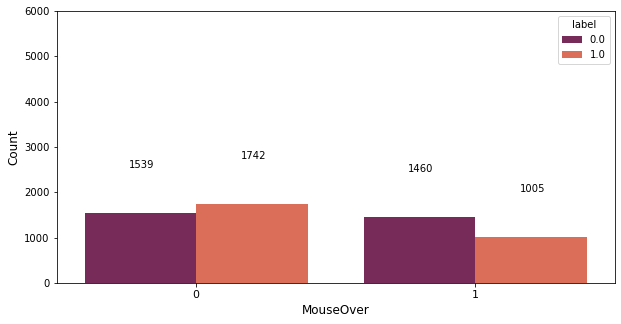

In [49]:
countlabel('MouseOver', ['0','1'])

# **III.3 Correlations**

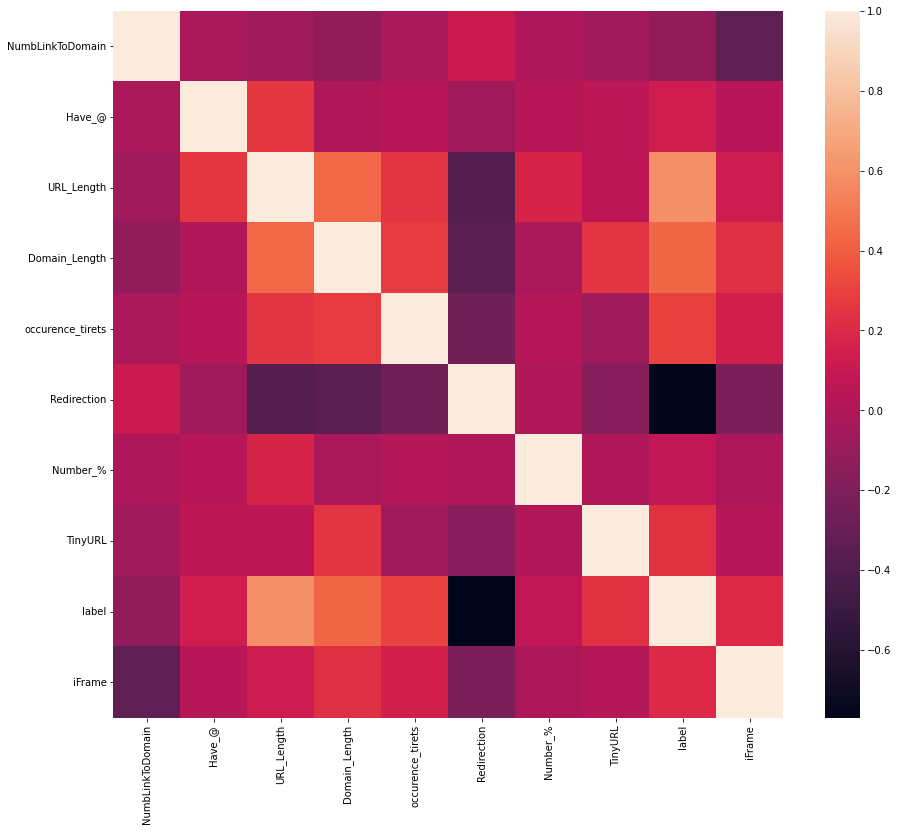

In [50]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

# **III.4 Final Dataset**

In [53]:
data.to_csv('./Datasets/database_websites.csv',index=False)